In [4]:
import pandas as pd

data = {'Algorithm': ['BERTopic', 'Top2vec', 'hLDA', 'HPAM'],
        'C_V': [0.7218, 0.4960, 0.8047, 0.5944],
        'C_UMASS':[-0.4451, -7.1703, -5.3761, -5.7841],
        'C_NPMI':[0.0744, -0.0458, 0.0022, -0.0828]
        }

df = pd.DataFrame(data)

df

,Algorithm,C_V,C_UMASS,C_NPMI
0,BERTopic,0.7218,-0.4451,0.0744
1,Top2vec,0.4960,-7.1703,-0.0458
2,hLDA,0.8047,-5.3761,0.0022
3,HPAM,0.5944,-5.7841,-0.0828


In [5]:
#ax = df.plot.barh(x='Document_Embedding_Method', y='Number_of_topics', rot=0)

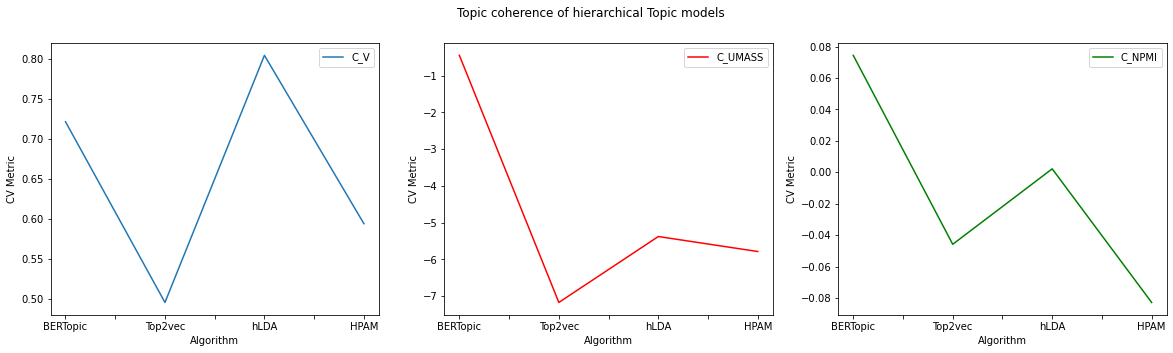

In [6]:
import matplotlib.pyplot as plt

# gca stands for 'get current axis'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Topic coherence of hierarchical Topic models')
df.plot(kind='line',x='Algorithm',y='C_V',ax=ax1, ylabel='CV Metric')
df.plot(kind='line',x='Algorithm',y='C_UMASS', color='red', ax=ax2, ylabel='CV Metric')
df.plot(kind='line',x='Algorithm',y='C_NPMI', color='green', ax=ax3, ylabel='CV Metric')

plt.show()

In [7]:
import pandas as pd

data = {'Algorithm': ['BERTopic', 'LDA', 'LDA(4,4)', 'NeuralLDA', 'ProdLDA', 'NMF'],
        'C_V': [0.7218, 0.3613, 0.3738, 0.3533, 0.5453, 0.5278],
        'C_UMASS':[-0.4451, -1.0890, -0.9737, -6.4088, -6.2303, -2.3602],
        'C_NPMI':[0.0744, 0.0018, 0.0110, -0.2231, 0.0271, 0.1290]
        }

df = pd.DataFrame(data)

df

,Algorithm,C_V,C_UMASS,C_NPMI
0,BERTopic,0.7218,-0.4451,0.0744
1,LDA,0.3613,-1.0890,0.0018
2,"LDA(4,4)",0.3738,-0.9737,0.0110
3,NeuralLDA,0.3533,-6.4088,-0.2231
4,ProdLDA,0.5453,-6.2303,0.0271
5,NMF,0.5278,-2.3602,0.1290


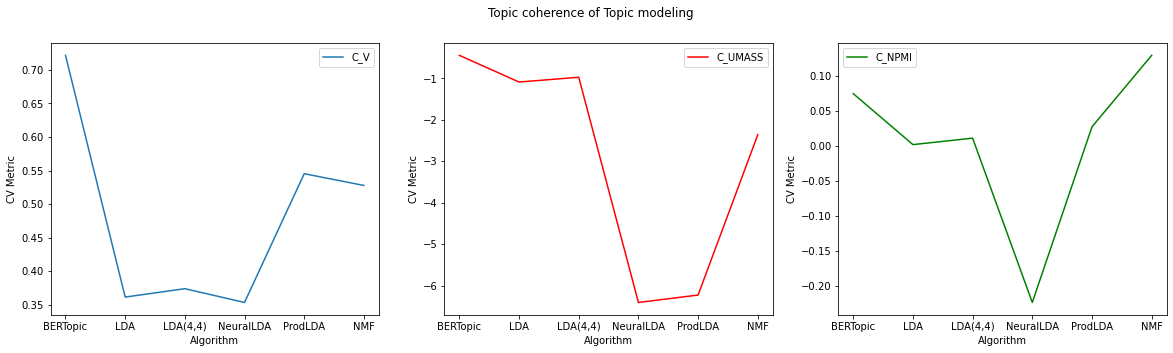

In [8]:
import matplotlib.pyplot as plt

# gca stands for 'get current axis'
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Topic coherence of Topic modeling')
df.plot(kind='line',x='Algorithm',y='C_V',ax=ax1, ylabel='CV Metric')
df.plot(kind='line',x='Algorithm',y='C_UMASS', color='red', ax=ax2, ylabel='CV Metric')
df.plot(kind='line',x='Algorithm',y='C_NPMI', color='green', ax=ax3, ylabel='CV Metric')

plt.show()

In [9]:
#bertopic

In [51]:
#small dataset
import numpy as np  
import pandas as pd

usptodata = pd.read_csv('U.S. Patents.csv')
usptodataset=usptodata[["grant_id","claims_text","abstract"]]
usptodataset= usptodata.dropna()
US_Patent_df = usptodataset.reset_index(drop=True)
US_Patent_df= US_Patent_df[['grant_id','abstract']]
US_Patent_df

,grant_id,abstract
0,USPP030977,"A new and distinct variety of Mango plant, her..."
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun..."
3,USPP030980,This invention relates to a new and distinct v...
4,USPP030981,A new and distinct cultivar of Strawberry plan...
...,...,...
7008,US10462947,Provided are a first component holding tool op...
7009,US10462948,In a case in which mounting deviation is occur...
7010,US10462949,A reel holding device is provided. The device ...
7011,US10462950,An electronic component bonding device include...


In [52]:
def cleantext(df): 
    
    US_Patent_df['cleaned_text'] = US_Patent_df['abstract'].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    
    # convert to lowercase
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].str.lower()
    
    #remove numbers
    US_Patent_df['cleaned_text'] =US_Patent_df['cleaned_text'].replace(r'\d+', '', regex = True)
        
    #remove_symbols
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'[^a-zA-Z0-9]', " ", regex=True)
    
    #remove punctuations 
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace(r'[[]!"#$%\'()\*+,-./:;<=>?^_`{|}]+',"", regex = True)
    
    #remove_URL(x):
    US_Patent_df['cleaned_text']  = US_Patent_df['cleaned_text'].replace(r'https.*$', "", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("   ", " ", regex = True)
    US_Patent_df['cleaned_text'] = US_Patent_df['cleaned_text'].replace("  ", " ", regex = True)
   
    return US_Patent_df

df = cleantext(US_Patent_df)

In [53]:
#remove stopwords and words_to_remove
import nltk
stopwords = nltk.corpus.stopwords.words('english')
df['cleaned_text_without_Stopwprd'] = df['cleaned_text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in stopwords]))


In [54]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
df["Lemmatization"] = df["cleaned_text_without_Stopwprd"].apply(lambda text: lemmatize_words(text))
df

,grant_id,abstract,cleaned_text,cleaned_text_without_Stopwprd,Lemmatization
0,USPP030977,"A new and distinct variety of Mango plant, her...",a new and distinct variety of mango plant here...,new distinct variety mango plant herein referr...,new distinct variety mango plant herein referr...
1,USPP030978,&#x2018;Honeysuckle Rose #1-6&#x2019; is a new...,x honeysuckle rose x is a new variety derived...,x honeysuckle rose x new variety derived x sim...,x honeysuckle rose x new variety derived x sim...
2,USPP030979,"A new and distinct peach tree variety, <i>Prun...",a new and distinct peach tree variety i prunus...,new distinct peach tree variety prunus persica...,new distinct peach tree variety prunus persica...
3,USPP030980,This invention relates to a new and distinct v...,this invention relates to a new and distinct v...,invention relates new distinct variety red ras...,invention relates new distinct variety red ras...
4,USPP030981,A new and distinct cultivar of Strawberry plan...,a new and distinct cultivar of strawberry plan...,new distinct cultivar strawberry plant named x...,new distinct cultivar strawberry plant named x...
...,...,...,...,...,...
7008,US10462947,Provided are a first component holding tool op...,provided are a first component holding tool op...,provided first component holding tool operatin...,provided first component holding tool operatin...
7009,US10462948,In a case in which mounting deviation is occur...,in a case in which mounting deviation is occur...,case mounting deviation occurring component mo...,case mounting deviation occurring component mo...
7010,US10462949,A reel holding device is provided. The device ...,a reel holding device is provided the device i...,reel holding device provided device includes c...,reel holding device provided device includes c...
7011,US10462950,An electronic component bonding device include...,an electronic component bonding device include...,electronic component bonding device includes m...,electronic component bonding device includes m...


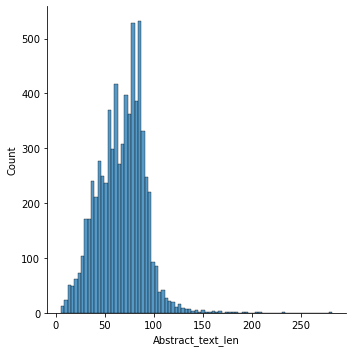

In [14]:
import seaborn as sns
# Create a new column corresponding to the length of each Abstract
df["Abstract_text_len"] = df["Lemmatization"].apply(lambda x : len(x.split()))

# Show the distribution of Abstract length 
sns.displot(df.Abstract_text_len, kde=False)

In [15]:
for idx in df.sample(3).index:
    Abstract = df.iloc[idx]
    print("Abstract #{}:".format(idx))
    print("grant_id: {}".format(Abstract.grant_id))
    print("Text: {}\n".format(Abstract.abstract))

Abstract #6979:
grant_id: US10462918
Text: A storage structure includes a cover, a main body, and a movable element. The main body includes a first board and a cavity. The first board has a first opening. The cover connects to the main body. The movable element is accommodated in the cavity and selectively disposed in the first opening.

Abstract #1983:
grant_id: US10457795
Text: Provided is a composition and process for producing a crosslinked product. The composition comprises a mixture constituting (a) an alkenyl silicone, (b) a hydrogen siloxane, (c) a cure inhibitor and (d) a hydrosilylation catalyst, optionally in the presence of a solvent, and (e) sulfur compounds in order to produce the crosslinked product, and the process comprises reacting such a composition to form a crosslinked product.

Abstract #1177:
grant_id: US10456921
Text: Provided is an industrial-robot control device including a microphone attached to an industrial robot, a specific-sound detector that detects a sp

In [55]:
from bertopic import BERTopic
from hdbscan import HDBSCAN
from umap import UMAP
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")

# Initiate UMAP
umap_model = UMAP(n_neighbors=30, 
                  n_components=5, 
                  min_dist=0.0, 
                  metric='cosine', 
                  random_state=100)

#HDBSCAN
hdbscan_model = HDBSCAN(min_cluster_size=30, min_samples = 10, metric='euclidean', cluster_selection_method='eom', prediction_data=True)


#CountVectorizer
vectorizer_model = CountVectorizer(max_features=1_000, min_df=10, ngram_range=(1, 3))

#c-TF-IDF
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)

#Run Model
topic_model = BERTopic(umap_model=umap_model,
                       embedding_model=sentence_model, 
                       hdbscan_model=hdbscan_model, 
                       vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model,
                       diversity=None)

# Run BERTopic model
topics, probabilities = topic_model.fit_transform(df['Lemmatization']) 

In [17]:
freq = topic_model.get_topic_info()
print("Number of topics: {}".format( len(freq)))
freq

Number of topics: 35


,Topic,Count,Name
0,-1,2593,-1_apparatus_body_member_sensor
1,0,785,0_memory_network_storage_data
2,1,319,1_composition_invention_treatment_present inve...
3,2,313,2_composition_polymer_resin_sub
4,3,311,3_wireless_station_communication_transmission
5,4,277,4_semiconductor_gate_layer_conductive
6,5,268,5_image_object_sample_color
7,6,224,6_voltage_converter_power_circuit
8,7,186,7_vehicle_sensor_driving_safety
9,8,177,8_distal_proximal_valve_tissue


In [25]:
# Hierachical topics
hierarchical_topics = topic_model.hierarchical_topics(df['Lemmatization'])
# Take a look at the data
hierarchical_topics

100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 254.70it/s]


,Parent_ID,Parent_Name,Topics,Child_Left_ID,Child_Left_Name,Child_Right_ID,Child_Right_Name,Distance
32,66,network_layer_data_image_user,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",61,valve_end_seat_shaft_assembly,65,network_layer_data_semiconductor_image,3.230523
31,65,network_layer_data_semiconductor_image,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 18, 19...",64,network_layer_semiconductor_data_image,63,video_variety_derived_frame_producing,2.843020
30,64,network_layer_semiconductor_data_image,"[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 14, 15, 18, 19...",56,network_image_data_user_node,62,layer_composition_semiconductor_substrate_elec...,2.180699
29,63,video_variety_derived_frame_producing,"[21, 22, 32]",50,video_frame_block_motion_color,22,variety_derived_producing_invention also_produced,1.773447
28,62,layer_composition_semiconductor_substrate_elec...,"[1, 2, 4, 9, 15, 18, 19, 23, 25, 26, 27, 33]",58,composition_sub_compound_invention_sub sub,60,semiconductor_layer_substrate_gate_touch,1.516075
27,61,valve_end_seat_shaft_assembly,"[8, 11, 12, 13, 16, 17, 20, 24, 28, 29, 30, 31]",53,heat_combustion_gas_cooling_air,57,valve_end_shaft_seat_distal,1.374602
26,60,semiconductor_layer_substrate_gate_touch,"[4, 9, 18, 19, 23, 25, 27, 33]",59,semiconductor_layer_gate_substrate_touch,33,emitting_nm_light_electrode_wiring,1.289526
25,59,semiconductor_layer_gate_substrate_touch,"[4, 9, 18, 19, 23, 25, 27]",52,semiconductor_layer_gate_substrate_conductive,55,touch_optical_sensing_screen_electrode,1.038205
24,58,composition_sub_compound_invention_sub sub,"[1, 2, 15, 26]",1,composition_invention_treatment_present invent...,54,battery_composition_sub_sub sub_polymer,1.030069
23,57,valve_end_shaft_seat_distal,"[8, 11, 12, 13, 16, 17, 20, 28, 29]",49,cutting_connector_cable_tool_container,48,valve_seat_shaft_distal_ring,0.998058


In [27]:
!pip install python-docx

     ---------------------------------------- 5.6/5.6 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-docx: filename=python_docx-0.8.11-py3-none-any.whl size=184519 sha256=9e0a824d489b94b336510a9027262e045efa4c55091512b3add4e42185321772
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\4c\b6\6e\9a47906ab5a01b992354f145757a15e58875af76389cc724e4
Successfully built python-docx


In [34]:
import docx

# Initialise the Word document
doc = docx.Document()
# Initialise the table
t = doc.add_table(rows=1, cols=hierarchical_topics.shape[1])
# Add borders
t.style = 'TableGrid'
# Add the column headings
for j in range(hierarchical_topics.shape[1]):
    t.cell(0, j).text = hierarchical_topics.columns[j]
# Add the body of the data frame
for i in range(hierarchical_topics.shape[0]):
    row = t.add_row()
    for j in range(hierarchical_topics.shape[1]):
        cell = hierarchical_topics.iat[i, j]
        row.cells[j].text = str(cell)
# Save the Word doc
doc.save('tableParent_child.docx')

In [35]:
!pip install openpyxl

In [37]:
# creating excel writer object
 
writer = pd.ExcelWriter('tableParent_child.xlsx')
# write dataframe to excel
 
hierarchical_topics.to_excel(writer)
 
# save the excel
writer.save()
print("DataFrame is exported successfully to 'tableParent_child.xlsx' Excel File.")


DataFrame is exported successfully to 'tableParent_child.xlsx' Excel File.


In [33]:
# Visualize heirarchical topics
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [23]:
# Topic tree
tree = topic_model.get_topic_tree(hierarchical_topics)
# Print out the tree
print(tree)

.
├─valve_end_seat_shaft_assembly
│    ├─heat_combustion_gas_cooling_air
│    │    ├─heat_combustion_gas_cooling_air
│    │    │    ├─■──combustion_gas_engine_pipe_internal ── Topic: 31
│    │    │    └─■──heat_cooling_air_protruding_thermal ── Topic: 24
│    │    └─■──container_compartment_cap_said_delivery ── Topic: 30
│    └─valve_end_shaft_seat_distal
│         ├─cutting_connector_cable_tool_container
│         │    ├─■──cutting_tool_edge_longitudinal_segment ── Topic: 28
│         │    └─connector_cable_container_side wall_locking
│         │         ├─■──connector_cable_conductor_locking_electrical ── Topic: 20
│         │         └─■──container_side wall_wall_cover_bottom ── Topic: 29
│         └─valve_seat_shaft_distal_ring
│              ├─seat_shaft_ring_bearing_outer
│              │    ├─seat_support_rear_door_front
│              │    │    ├─■──door_lock_locking_fastener_clamp ── Topic: 16
│              │    │    └─■──seat_support_rear_front_side ── Topic: 12
│           

In [75]:
# A function to map parent and child topics
def topic_mapping(child_topic_number):
    if child_topic_number in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]:
        return 'network_layer_data_image_user'
    elif child_topic_number in [8, 11, 12, 13, 16, 17, 20, 28, 29]:
        return 'valve_end_shaft_seat_distal'
    elif child_topic_number in [25, 27]:
        return 'touch_optical_sensing_screen_electrode'
    elif child_topic_number in [5, 10, 14]:
        return 'image_object_sample_apparatus_color'

In [76]:
# Get the child topic predictions from the basic BERTopic model
child_topic_prediction = topic_model.topics_[:]
# Save the child predictions in the dataframe
df['child_topic'] = child_topic_prediction
# Create the parent topics
df['parent_topic'] = df['child_topic'].apply(topic_mapping)
# Take a look at the data
topic_mapping =df[["grant_id","abstract","child_topic","parent_topic"]].sample(n = 10)
topic_mapping

,grant_id,abstract,child_topic,parent_topic
5841,US10461750,A semiconductor device includes a latch circui...,6,network_layer_data_image_user
5298,US10461186,Disclosed are methods wherein vertical field e...,4,network_layer_data_image_user
948,US10456688,The present disclosure provides a method of sy...,32,network_layer_data_image_user
4927,US10460807,A non-volatile memory device using existing ro...,0,network_layer_data_image_user
423,US10456142,A surgical saw blade for being coupled to a dr...,28,network_layer_data_image_user
631,US10456354,"The present invention provides stable, ready-t...",1,network_layer_data_image_user
46,US10455760,"Described herein are systems, methods, and app...",-1,None
1936,US10457741,A framework fragment derived from a chicken an...,1,network_layer_data_image_user
3032,US10458877,A leak detection system for flat commercial ro...,-1,None
4273,US10460147,"A display screen is provided, including a disp...",9,network_layer_data_image_user


In [50]:
import docx

# Initialise the Word document
doc = docx.Document()
# Initialise the table
t = doc.add_table(rows=1, cols=topic_mapping.shape[1])
# Add borders
t.style = 'TableGrid'
# Add the column headings
for j in range(topic_mapping.shape[1]):
    t.cell(0, j).text = topic_mapping.columns[j]
# Add the body of the data frame
for i in range(topic_mapping.shape[0]):
    row = t.add_row()
    for j in range(topic_mapping.shape[1]):
        cell = topic_mapping.iat[i, j]
        row.cells[j].text = str(cell)
# Save the Word doc
doc.save('topic_mapping.docx')

In [57]:
# Get the topic predictions
topic_prediction = topic_model.topics_[:]

# Save the predictions in the dataframe
df['topic_prediction'] = topic_prediction

# Take a look at the data
# Take a look at the data
topic_mapping =df[["grant_id","abstract","topic_prediction"]].sample(n = 10)
topic_mapping

,grant_id,abstract,topic_prediction
3470,US10459328,"A display device includes a screen, first and ...",-1
5818,US10461727,A system and method for generating a plurality...,6
4933,US10460813,A nonvolatile memory device according to some ...,0
892,US10456629,A golf ball comprising an inner core comprisin...,-1
1423,US10457176,Provided is a conveyance seat configured for a...,12
6588,US10462519,Systems and methods for dynamically and automa...,-1
3641,US10459504,An in-vehicle system is described that initiat...,10
3443,US10459301,Provided is a liquid crystal display device in...,9
355,US10456074,Described herein are systems and methods for c...,7
3637,US10459499,In accordance with these and other embodiments...,24


In [58]:
import docx

# Initialise the Word document
doc = docx.Document()
# Initialise the table
t = doc.add_table(rows=1, cols=topic_mapping.shape[1])
# Add borders
t.style = 'TableGrid'
# Add the column headings
for j in range(topic_mapping.shape[1]):
    t.cell(0, j).text = topic_mapping.columns[j]
# Add the body of the data frame
for i in range(topic_mapping.shape[0]):
    row = t.add_row()
    for j in range(topic_mapping.shape[1]):
        cell = topic_mapping.iat[i, j]
        row.cells[j].text = str(cell)
# Save the Word doc
doc.save('topic_Predication.docx')

In [63]:
# New data for the review
new_review = "Disclosed is a touch screen device for accurately detecting a touch by using a touch pen without having a separate sensor provided in a touch panel. The touch screen device includes a touch screen including a plurality of touch electrodes, a touch driving circuit applying a touch electrode driving signal to the plurality of touch electrodes, and a touch pen receiving the touch electrode driving signal applied to the plurality of touch electrodes and transmitting a pen output signal, synchronized with the received touch electrode driving signal, to the touch screen."

# Find topics
num_of_topics = 3
similar_topics, similarity = topic_model.find_topics(new_review, top_n=num_of_topics); 

# Print results
print(f'The top {num_of_topics} similar topics are {similar_topics}, and the similarities are {np.round(similarity,2)}')

The top 3 similar topics are [25, -1, 32], and the similarities are [0.54 0.28 0.28]


In [60]:
new_review

'Disclosed is a touch screen device for accurately detecting a touch by using a touch pen without having a separate sensor provided in a touch panel. The touch screen device includes a touch screen including a plurality of touch electrodes, a touch driving circuit applying a touch electrode driving signal to the plurality of touch electrodes, and a touch pen receiving the touch electrode driving signal applied to the plurality of touch electrodes and transmitting a pen output signal, synchronized with the received touch electrode driving signal, to the touch screen.'

In [61]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,2593,-1_apparatus_body_member_sensor
1,0,785,0_memory_network_storage_data
2,1,319,1_composition_invention_treatment_present inve...
3,2,313,2_composition_polymer_resin_sub
4,3,311,3_wireless_station_communication_transmission
5,4,277,4_semiconductor_gate_layer_conductive
6,5,268,5_image_object_sample_color
7,6,224,6_voltage_converter_power_circuit
8,7,186,7_vehicle_sensor_driving_safety
9,8,177,8_distal_proximal_valve_tissue


In [64]:

preds, probs = topic_model.transform(new_review)
print(preds)

[25]


In [73]:
topic_model.visualize_barchart(top_n_topics=33)

In [83]:
def search(dataFrame, item):
    mask = (dataFrame.applymap(lambda x: isinstance(x, str) and item in x)).any(1)
    return dataFrame[mask]

parenttopic_Predication=search(hierarchical_topics,'25')
parenttopic_Predication

,Parent_ID,Parent_Name,Topics,Child_Left_ID,Child_Left_Name,Child_Right_ID,Child_Right_Name,Distance
21,55,touch_optical_sensing_screen_electrode,"[25, 27]",27,optical_aperture_positive_axis_negative,25,touch_sensing_screen_electrode_panel,0.920352


In [84]:
import docx

# Initialise the Word document
doc = docx.Document()
# Initialise the table
t = doc.add_table(rows=1, cols=parenttopic_Predication.shape[1])
# Add borders
t.style = 'TableGrid'
# Add the column headings
for j in range(parenttopic_Predication.shape[1]):
    t.cell(0, j).text = parenttopic_Predication.columns[j]
# Add the body of the data frame
for i in range(parenttopic_Predication.shape[0]):
    row = t.add_row()
    for j in range(parenttopic_Predication.shape[1]):
        cell = parenttopic_Predication.iat[i, j]
        row.cells[j].text = str(cell)
# Save the Word doc
doc.save('parenttopic_Predication.docx')

In [86]:
# Topic tree
tree = topic_model.get_topic_tree(parenttopic_Predication)
# Print out the tree
print(tree)

.
├─■──optical_aperture_positive_axis_negative ── Topic: 27
└─■──touch_sensing_screen_electrode_panel ── Topic: 25

